In [1]:
import pandas as pd

police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')

print (police_killings.head())

                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0   

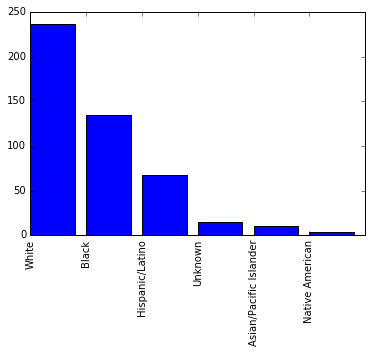

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

In [2]:
import matplotlib.pyplot as plt
#Prev used numpy.arange to find, but range also can work.
import numpy as np
%matplotlib inline

#Running value_counts() on series

counts = police_killings['raceethnicity'].value_counts()

plt.bar(range(6), height = counts)
plt.xticks(range(6), counts.index, rotation="vertical")
plt.show()

# Reviewing Percentages

(counts/sum(counts)) * 100

median: 22348.000000


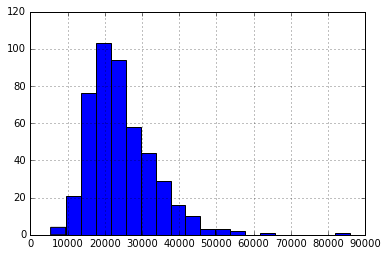

In [3]:
# Examining the income levels of the victim's area

condition = police_killings['p_income'] != '-'

income = police_killings['p_income'][condition].astype(float).hist(bins = 20)
median = police_killings['p_income'][condition].astype(float).median()

print ('median: %f' %median)

In [4]:
#Reading state population data / merging with police_killings data
state_pop = pd.read_csv('state_population.csv')
counts = police_killings ['state_fp'].value_counts()

#Create a new dataframe that holds the shooting counts
states = pd.DataFrame({
        "STATE": counts.index,
        "shootings": counts
    })

# print (counts)

#Merge the Data
states = states.merge(state_pop, on="STATE")

#Create a new column
states['pop_millions'] = states['POPESTIMATE2015']/1000000
states['rate'] = states['shootings']/states['pop_millions']

print(states.sort("rate"))

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
43      9          1      40      1        1           Connecticut   
22     42          7      40      1        2          Pennsylvania   
38     19          2      40      2        4                  Iowa   
6      36         13      40      1        2              New York   
29     25          5      40      1        1         Massachusetts   
42     33          1      40      1        1         New Hampshire   
45     23          1      40      1        1                 Maine   
11     17         11      40      2        3              Illinois   
12     39         10      40      2        3                  Ohio   
31     55          5      40      2        3             Wisconsin   
16     26          9      40      2        3              Michigan   
28     47          6      40      3        6             Tennessee   
15     37         10      40      3        5        North Carolina   
36     32          3

/Users/Hayw1re/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
IL    11
NJ    11
LA    11
MO    10
MD    10
NC    10
OH    10
SC     9
MI     9
VA     9
AL     8
IN     8
OR     8
KY     7
PA     7
MN     6
NE     6
MS     6
KS     6
TN     6
UT     5
NM     5
MA     5
WI     5
ID     4
AR     4
HI     4
NV     3
IA     2
MT     2
DE     2
AK     2
WV     2
NH     1
ME     1
WY     1
CT     1
DC     1
Name: state, dtype: int64

In [6]:
# print(police_killings.describe())

pk = police_killings[
(police_killings['share_white'] != '-') &
(police_killings['share_black'] != '-') &
(police_killings['share_hispanic'] != '-')
]

pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

print(pk['state'])


lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

0      AL
1      LA
2      WI
3      CA
4      OH
5      AZ
6      CA
7      CA
8      TX
9      MI
10     CA
11     CA
12     TX
13     IN
14     IN
15     TN
16     GA
17     VA
18     CA
19     CA
20     CA
21     NE
22     KS
23     CA
24     OK
25     OR
26     NH
27     CA
28     FL
29     TX
       ..
437    NE
438    WA
439    NM
440    CA
441    CO
442    IL
443    WI
444    TX
445    MS
446    OK
447    ID
448    WI
449    NE
450    TX
451    TX
452    NY
453    TX
454    CA
455    NY
456    VA
457    SC
458    TX
459    TX
460    AL
461    NJ
462    VA
463    WA
464    NC
465    CA
466    CA
Name: state, dtype: object


/Users/Hayw1re/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hayw1re/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hayw1re/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [7]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [8]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64